# 필요 라이브러리 호출

In [492]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

# 폰트 지정

In [493]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

# 데이터 호출 및 필요없는 컬럼 드랍

In [494]:
df = pd.read_csv("usage_by_weather2.csv")
df = df.drop(columns = ['Unnamed: 0', 'customer', 'wh'])
df.head(3)

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,10577876.27


In [495]:
df_kwh = pd.DataFrame(df['kwh'])
df_kwh

,kwh
0,11154070.87
1,10820313.94
2,10577876.27
3,11410542.58
4,11097614.74
...,...
725,9442942.40
726,9679363.18
727,11754265.48
728,12149583.10


# 일수에 따른 전력 사용량 그래프

# 그래프 크기 설정
plt.figure(figsize=(19, 6))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(df_kwh, marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(df_kwh.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('2020~2022 일별 사용량 (kwh)')

# x축 레이블 설정
plt.xlabel('사용 일')

# y축 레이블 설정
plt.ylabel('사용량(kWh)')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()


# 데이터 프레임 -> 피봇 테이블

In [496]:
kw_df_year_month_day = df.pivot_table(index=['day'], 
                                     columns='month',
                                     values='kwh', 
                                     aggfunc='sum')
kw_df_year_month_day

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,21924744.84,22895338.06,30392843.69,32644171.15,27033443.58,19728230.06,35128467.98,28608079.22,24870903.43,21050310.76,29353650.34,28699724.37
2,26440046.20,32469746.59,35231834.65,34569349.99,25438913.95,25777572.90,29225867.31,25912928.89,23007591.88,28691906.33,33799522.33,28570096.57
3,26074029.46,28254555.62,32321892.68,30653352.98,26941573.52,29727575.35,32113913.72,28242517.57,25223327.25,27053991.64,25683846.37,27263255.65
4,29287287.38,29294151.82,34489694.99,33323073.89,29289014.51,28024767.84,38216032.50,32803767.93,20979580.46,29804931.48,27813431.69,23759121.28
5,28219811.70,28616964.08,35826242.30,31272415.26,23688549.83,24150214.87,28731915.66,36366650.69,22600527.26,25161451.19,25751864.72,26615072.10
6,25956920.41,23559656.50,33012149.94,32135184.04,25432890.91,25446951.44,32362830.73,30978372.22,21983894.46,30360772.27,26316925.27,27522763.36
7,24864321.03,29272881.93,35340364.02,49528390.20,28005449.39,30226856.45,33589593.74,28988503.50,29788316.31,30340798.56,26248400.57,29839184.67
8,25984877.53,33535249.74,31962235.87,30478572.98,25732159.02,25393717.66,35085235.81,27570424.60,27056131.60,36877316.13,26814850.24,23471786.32
9,37956215.01,32173645.38,33542737.81,28859551.81,24482457.71,27083860.49,31299771.87,35055115.71,25146171.70,38069985.50,28136384.63,24908181.79


# 월별 날짜에 따른 전력 사용량 축적치

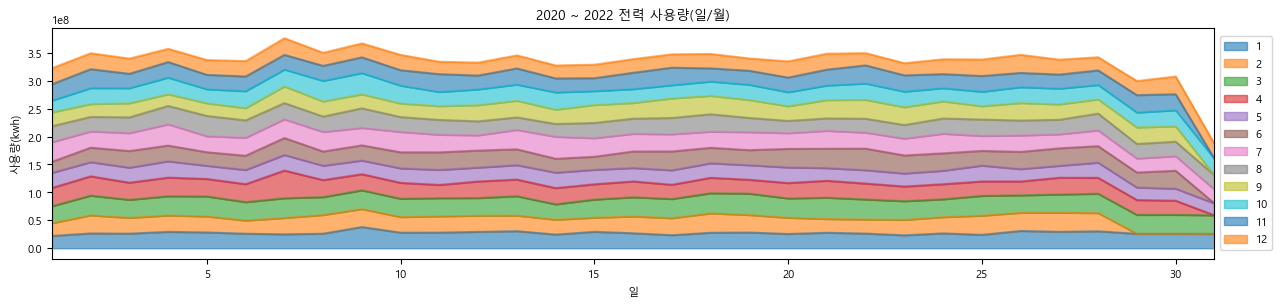

In [497]:
title='2020 ~ 2022 전력 사용량(일/월)'
ylabel='사용량(kwh)'
xlabel='일'



ax = kw_df_year_month_day.plot.area(figsize=(15,3),alpha=0.6, title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [498]:
df_type = df
kw_df = df_type.groupby(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar'])['kwh'].sum()
kw_df = kw_df.to_frame().reset_index()
kw_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,11097614.74
...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,12149583.10


# 기온과 전력 소비량 시각화

<AxesSubplot:title={'center':'기온에 따른 소비량(일)'}, xlabel='temp', ylabel='kwh'>

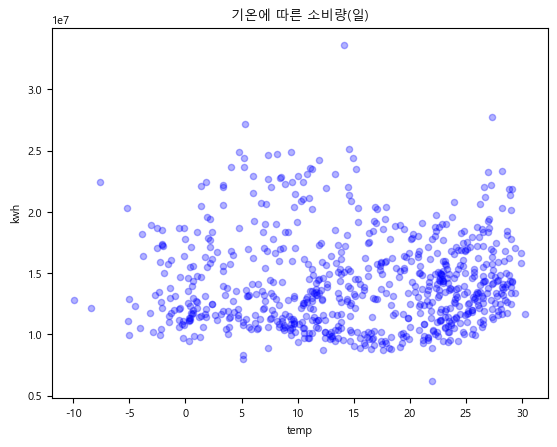

In [499]:
title='기온에 따른 소비량(일)'
ylabel='전력 소비량(kwh)'
xlabel='기온'
df.plot.scatter(x='temp', y='kwh', c='blue', cmap='coolwarm',alpha=0.3, title=title)

# 날씨와 전력 소비량의 상관관계 시각화(일 기준)

In [500]:
column_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량'}

for feature in column_df:
    fig = px.scatter(kw_df,
                    x="temp",
                    y="kwh",
                    title='날씨와 전력 소비량의 상관관계(일)',
                    template='plotly_dark',
                    color=feature,
                    color_continuous_scale=["white", "red"],
                    labels={'temp': '기온', 'kwh': '전력량(kWh)', feature: col_label[feature]})
    fig.show()

# 날씨와 전력 소비량의 상관관계 시각화 2(일 기준)

In [501]:
_df = ['temp', 'Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'temp' : '기온',
             'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '일사량'}

for feature in _df:
    # Box plot 생성
    box = go.Box(x=kw_df[feature], y=kw_df['kwh'], boxpoints='all')

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력 소비량의 상관관계(일)', xaxis={'title': col_label[feature]}, 
                    yaxis={'title': '전력량(kwh)'},
                    template='plotly_dark')

    # 그래프 생성
    fig = go.Figure(data=[box], layout=layout)

    # 그래프 출력
    fig.show()

# 날씨와 전력 소비량의 상관관계 시각화 3(일 기준)

In [502]:
_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '일사량'}

for feature in _df:
    # Heatmap 생성
    heatmap = go.Heatmap(x=kw_df['temp'], y=kw_df['kwh'], z=kw_df[feature])

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력 소비량의 상관관계(일)                  색 : ' + col_label[feature],
                       xaxis={'title': '기온'}, yaxis={'title': '전력량(kwh)'})

    # 그래프 생성
    fig = go.Figure(data=[heatmap], layout=layout)

    # 그래프 출력
    fig.show()

# 각 (기상데이터)컬럼별 전력 사용량과의 관계 (일 기준)

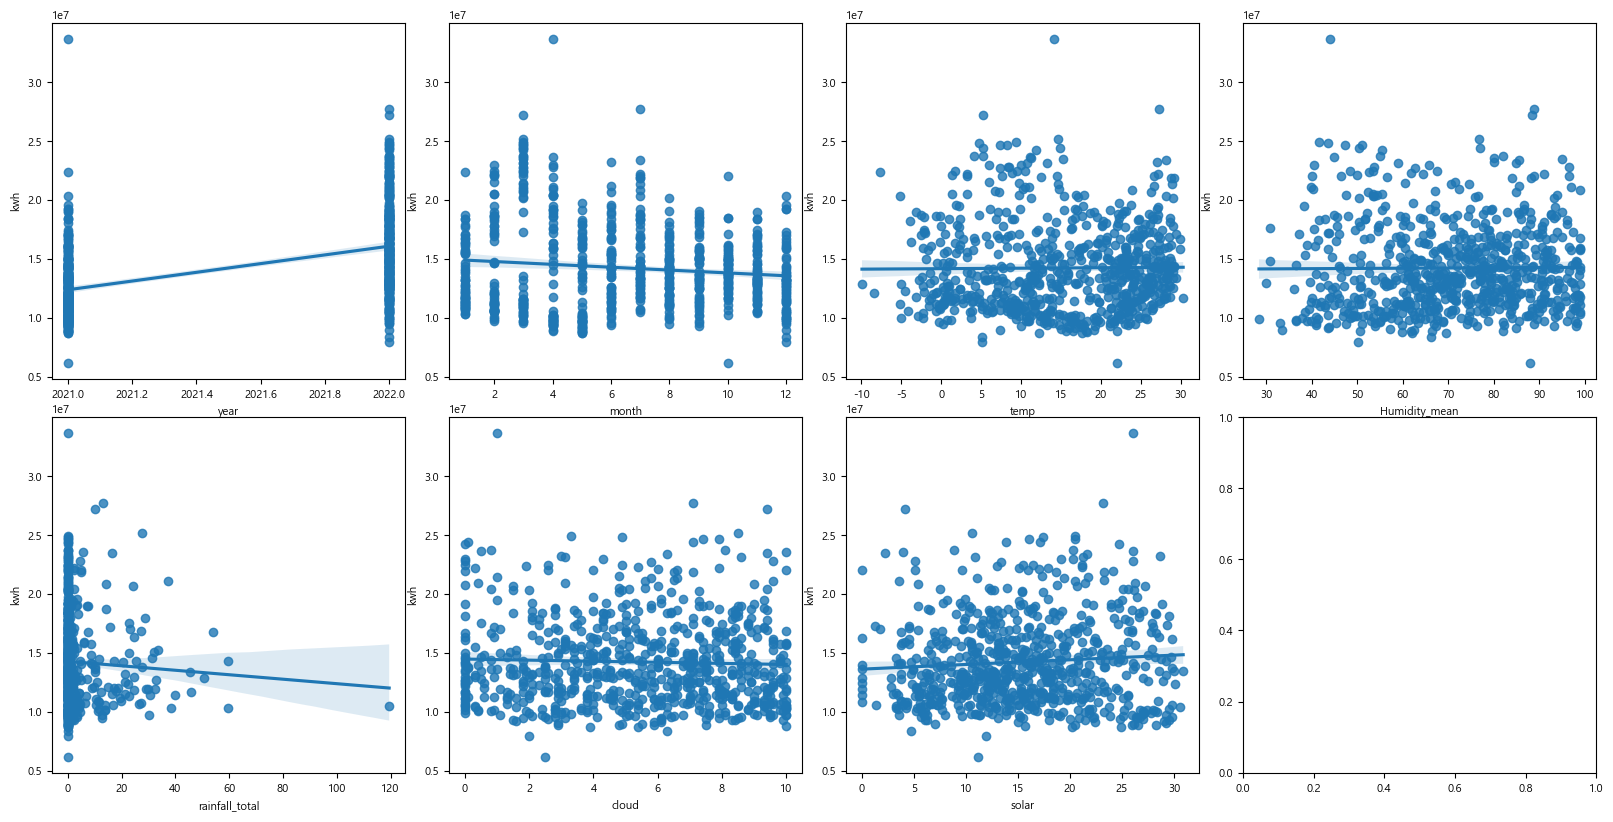

In [503]:
lm_features = ['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
plt.tight_layout()
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'kwh', data = kw_df, ax = axs[row][col])

# 각 (기상데이터)컬럼별 전력 사용량과의 관계 2 (일 기준)

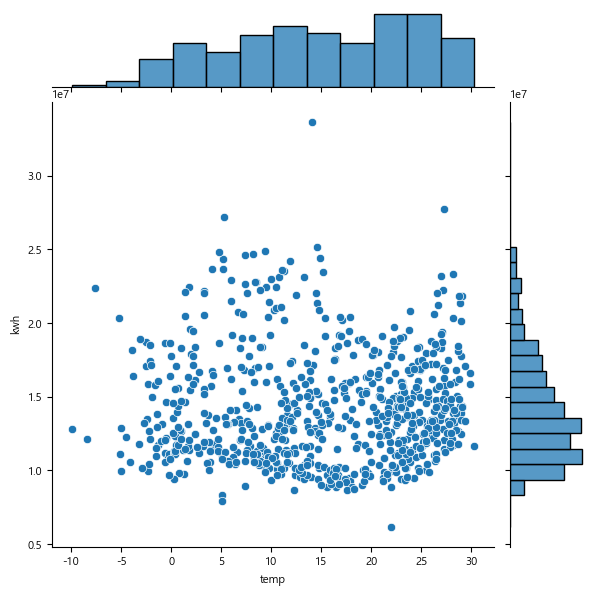

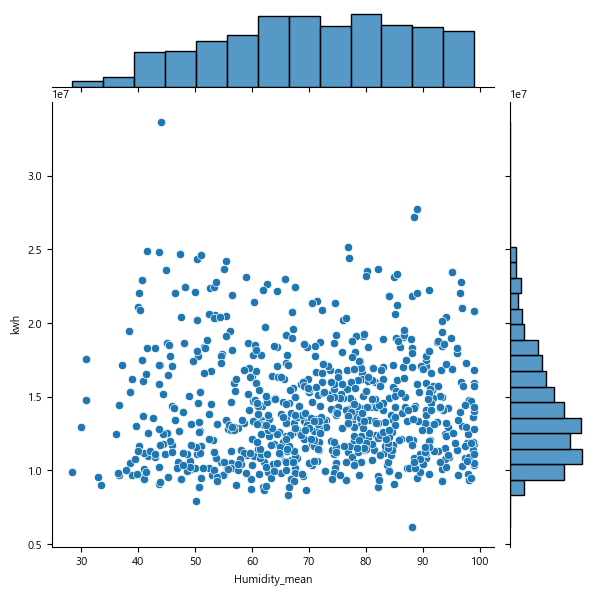

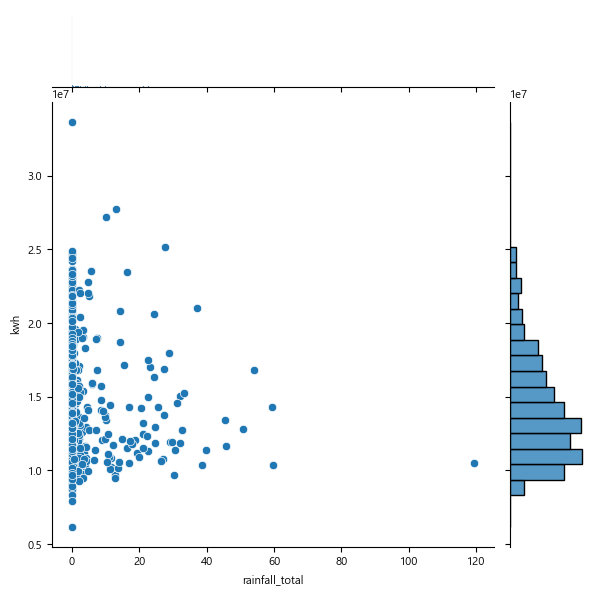

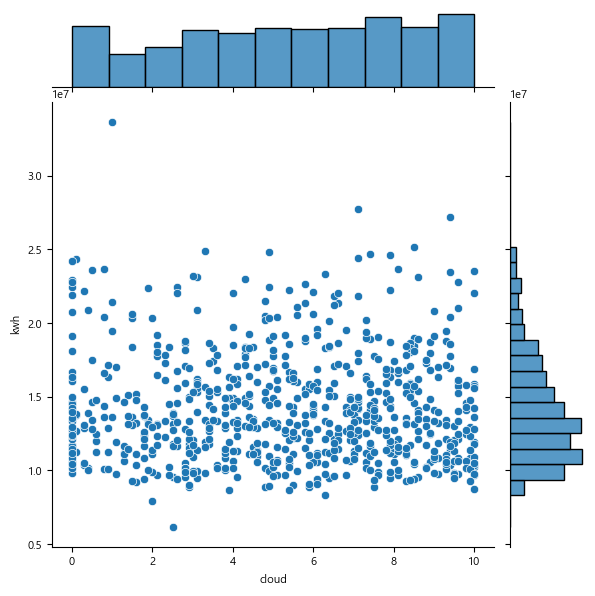

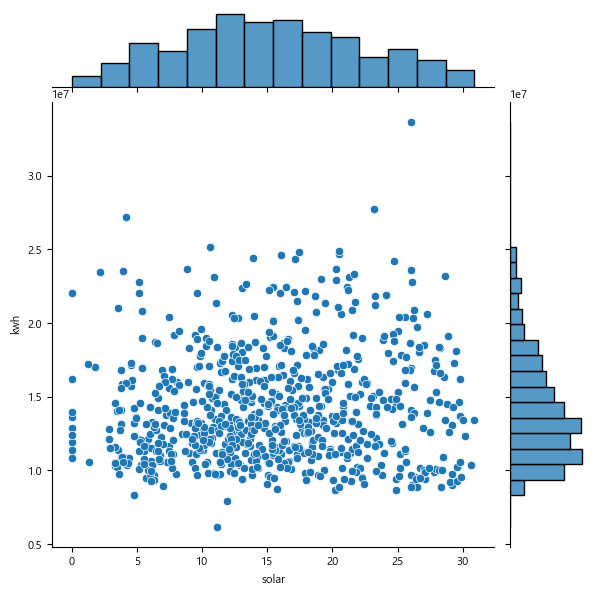

In [504]:
weather_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar']

for feature in weather_df:
    sns.jointplot(x = feature, y = 'kwh', data = df)

# 일별 전력 사용량 그래프

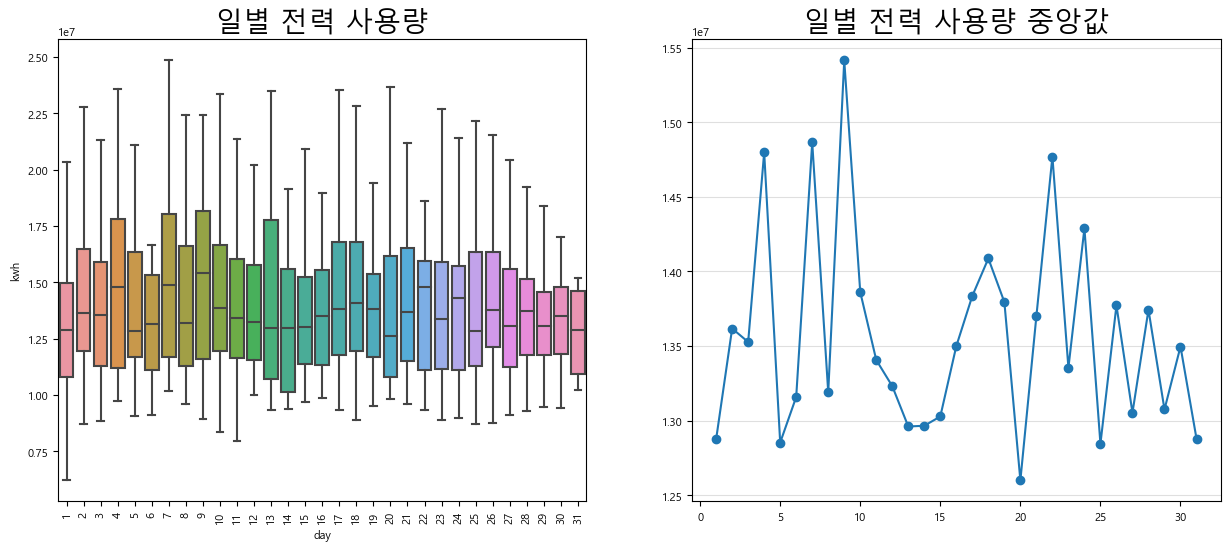

In [505]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="day", y="kwh", data=kw_df, showfliers=False)
g.set_title('일별 전력 사용량', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(kw_df.groupby('day')['kwh'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('일별 전력 사용량 중앙값', size = 20)
plt.show()

# 습도, 운량별 전력 사용률 (일 기준)

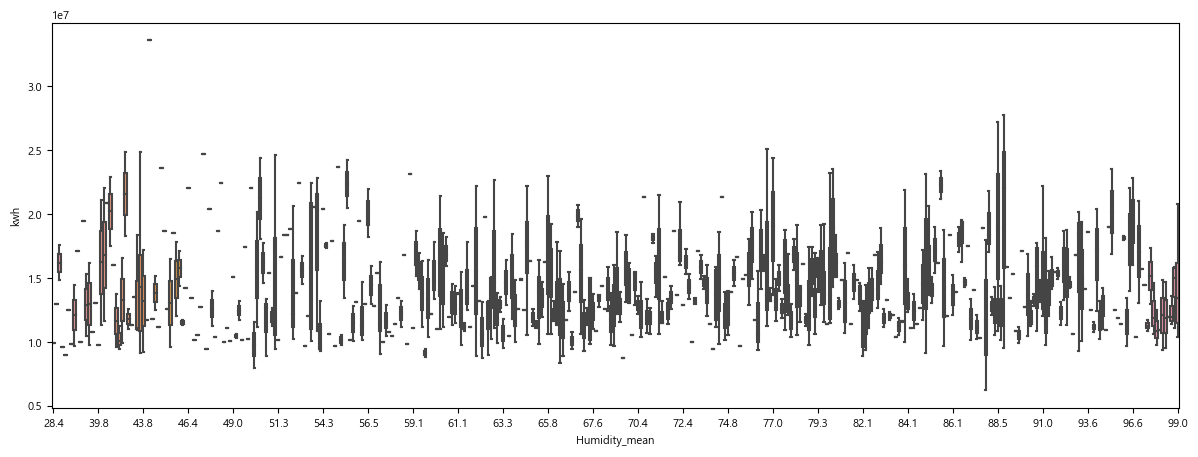

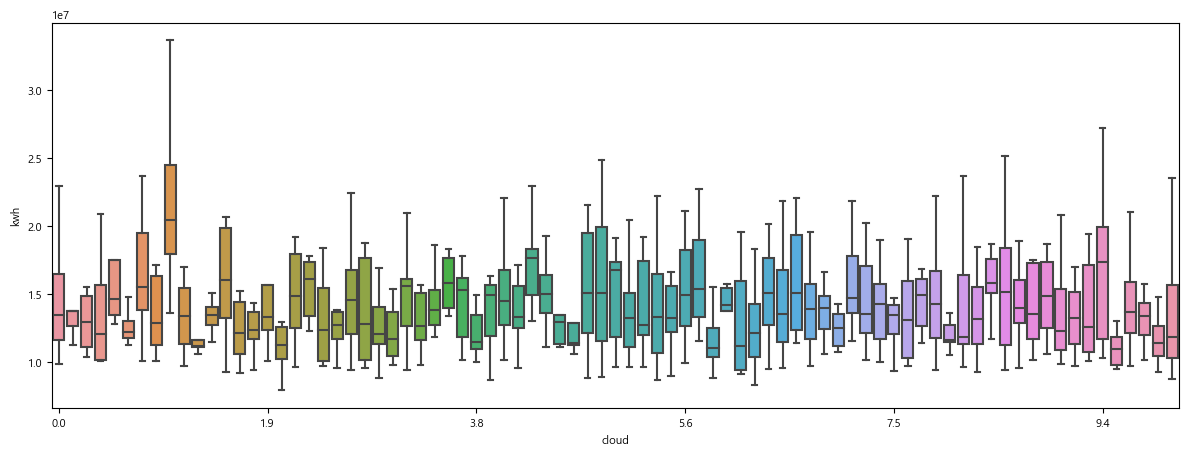

In [510]:
plt.figure(figsize=(32,5)) # 그래프 크기 조정 
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='Humidity_mean', y='kwh', data = kw_df, showfliers=False)
ax.xaxis.set_major_locator(plt.MultipleLocator(15))

plt.figure(figsize=(32,5), ) # 그래프 크기 조정
plt.subplot(1,2,2) # 1행 2열의 첫번째(1행, 1열) 그래프
plt.xlabel(xlabel = '운량')
ax = sns.boxplot(x='cloud', y='kwh', data = kw_df, showfliers=False)
ax.xaxis.set_major_locator(plt.MultipleLocator(15))
plt.show()

# 달/일 기준으로 피봇테이블 작성

In [507]:
kw_df_year_month_day = df.pivot_table(index=['month'], 
                                     columns='day',
                                     values='kwh', 
                                     aggfunc='sum')

# 월/일별 전력 사용량

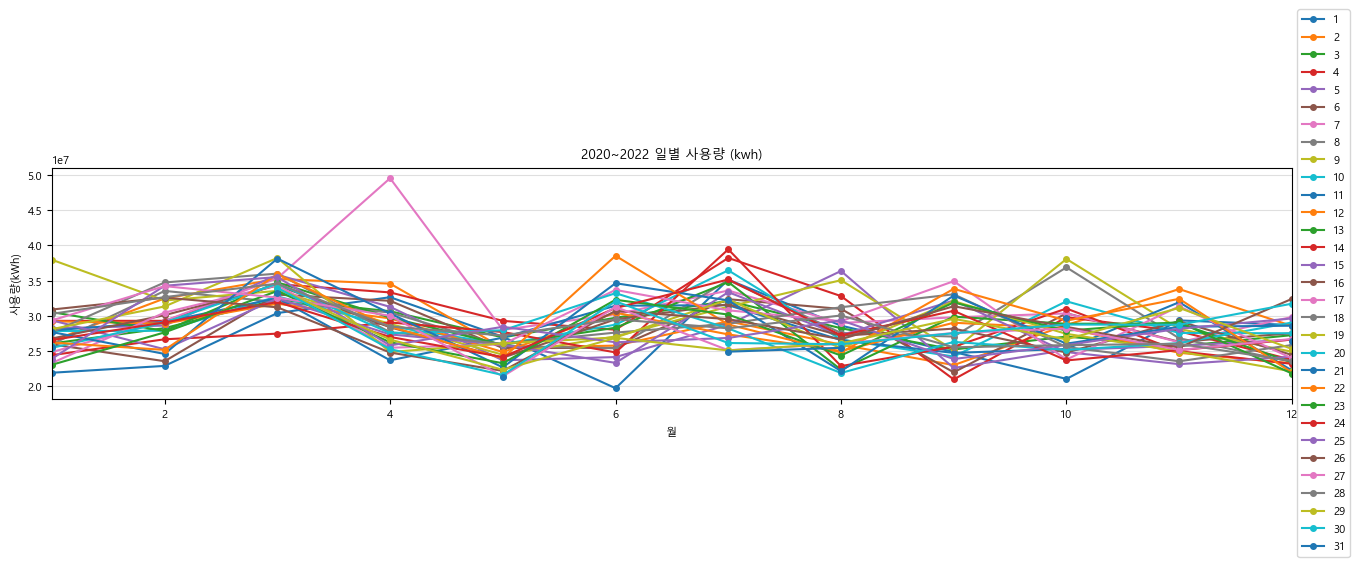

In [508]:
plt.figure(figsize = (16,3))
plt.plot(kw_df_year_month_day, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(kw_df_year_month_day.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2020~2022 일별 사용량 (kwh)')
plt.xlabel('월')
plt.ylabel('사용량(kWh)')
plt.autoscale(axis='x', tight=True)
plt.show()

# 각 컬럼과의 상관 관계도

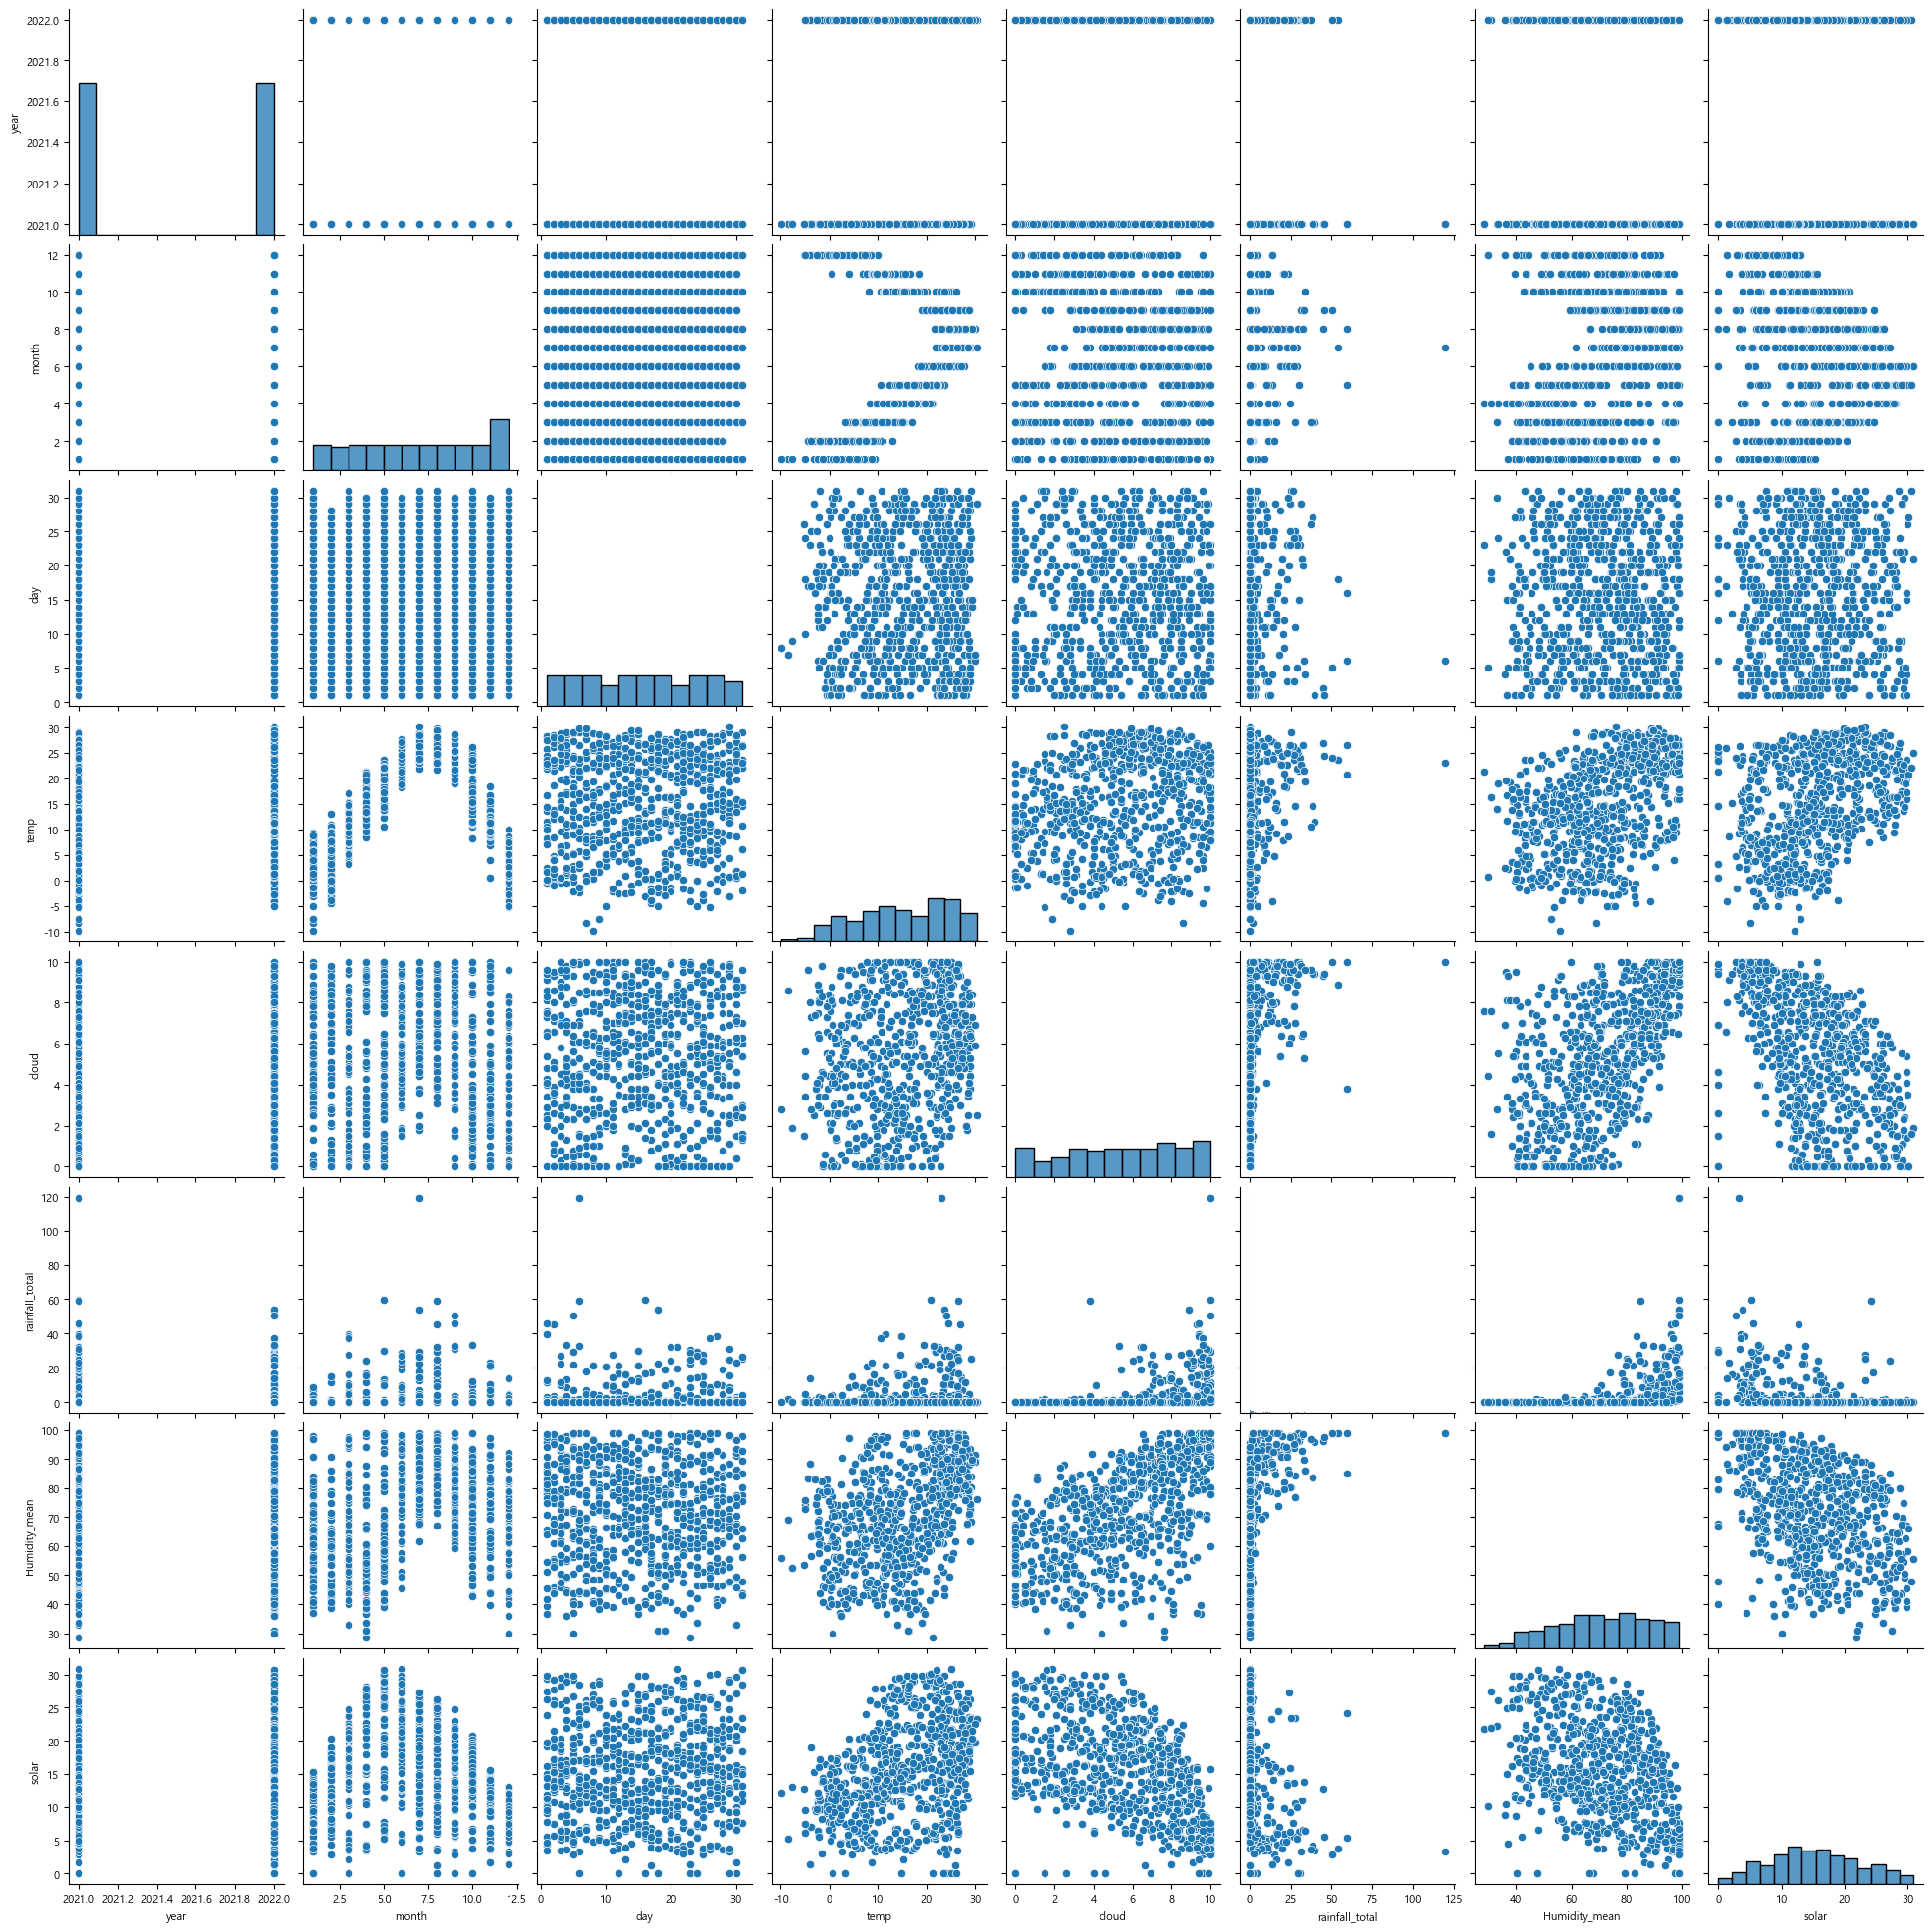

In [509]:
cols = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar']
sns.pairplot(df[cols])
plt.show()